# **Assignment 1**
## **Group 2:**
* Karyl Grasparil
* Mariah Quinquito
* Yanna Polonia

In [1]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# 1. Data Steps

## Loading Country-data.csv into a pandas dataframe named data and printing its header

In [2]:
data = pd.read_csv('files/Country-data.csv')

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


##  Summarizing data, explaining and making observations about each column in the dataset

In [4]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<table>
<tr><tr><th><th style="text-align:center">Feature<th style="text-align:center">Kaggle Description<th><th style="text-align:center">Observations<tr><tr>
<tr><td><td style="text-align:center">country<td style="text-align:left">Country name<td><td><td>
<tr><td><td style="text-align:center">child_mort<td style="text-align:left">Death of children under 5 years of age per 1000 live births<td><td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is dispersed<td>
<tr><td><td style="text-align:center">exports<td style="text-align:left">Exports of goods and services per capita. Given as %age of the GDP per capita<td><td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is partially dispersed<td>
<tr><tr><tr><td><td style="text-align:center">health<td style="text-align:left">Total health spending per capita. Given as %age of GDP per capita<td><td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is clustered close to the mean<td>
<tr><td><td style="text-align:center">imports<td style="text-align:left">Imports of goods and services per capita. Given as %age of the GDP per capita<td><td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is partially dispersed<td>
<tr><td><td style="text-align:center">income<td style="text-align:left">Net income per person<td><td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is dispersed<td>
<tr><td><td style="text-align:center">inflation<td style="text-align:left">The measurement of the annual growth rate of the Total GDP<td><td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is dispersed<td>
<tr><tr><tr><td><td style="text-align:center">life_expec<td style="text-align:left">The average number of years a new born child would live if the current mortality patterns are to remain the same<td><td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is clustered close to the mean<td>
<tr><td><td style="text-align:center">total_fer<td style="text-align:left">The number of children that would be born to each woman if the current age-fertility rates remain the same.<td><td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is clustered close to the mean<td>
<tr><td><td style="text-align:center">gdpp<td style="text-align:left">The GDP per capita. Calculated as the Total GDP (Gross domestic product ) divided by the total population.<td><td style="text-align:left">Based on mean, min and max values and standard deviation values, we can conclude the data is dispersed<td>
</table>

## Verifying the datatype of each entry and if there are any missing values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


### <span style='color:blue'>There are NO missing values, as there are 167 non-null values for each feature</span>

## Validating if there are duplicated entries

In [6]:
data[data.duplicated(keep = False)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


### <span style='color:blue'>There are not duplicated entries as getting all the duplicate items (using parameter keep = False) returns an empty dataframe.</span>

## Dropping the 'country' column and storing it in a separate dataframe named countries

In [7]:
# Storing country column/feature in a pandas DataFrame named countries
countries = pd.DataFrame(data['country'])
countries.head()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda


In [8]:
data = data.drop('country', axis = 1)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Using seaborn.heatmap to display the correlation matrix of the features (using corr function in pandas to obatin correlation of columns), using cmap = 'coolwarm' to differentiate high, low, and medium correlations

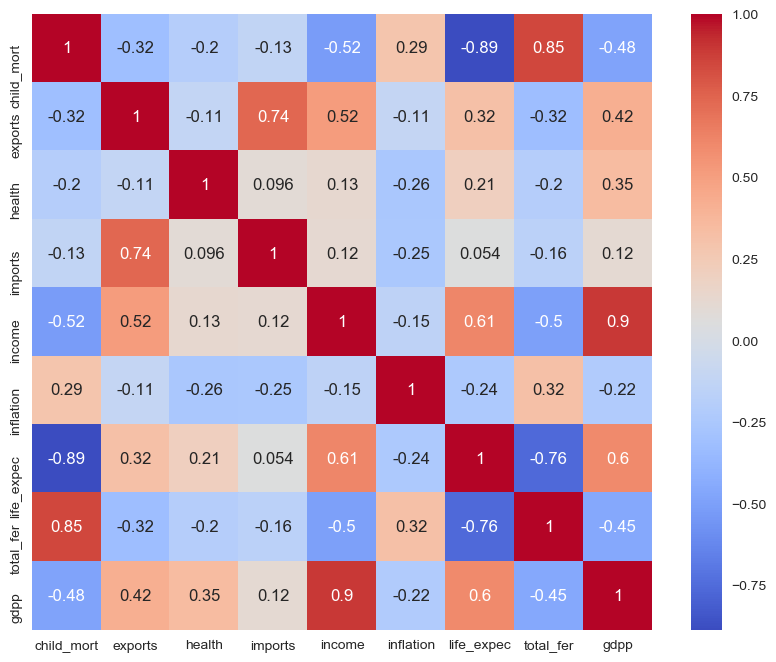

In [9]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), cmap = 'coolwarm', annot=True)
plt.show()

### <span style='color:blue'>The highest correlation among columns are as follow (considering values greater or equal to 0.7):</span>

* <span style='color:blue'>income and gdpp</span>
* <span style='color:blue'>child_mort and total_fer</span>
* <span style='color:blue'>exports and import</span>

#### <span style='color:blue'>Note: There is almost a linear relationship between pairs listed before, somehow the two variables change in a similar manner, and changes in one can predict changes in the other.</span>

### <span style='color:blue'>The lowest correlation among columns are as follow (considering values less or equal to -0.7 ):</span>

* <span style='color:blue'>child_mort and life_expect</span>
* <span style='color:blue'>life_expect and total_fer</span>

#### <span style='color:blue'>Note: There is almost a inverse proposional linear relationship between pairs listed before.</span>

## Using seaborn.pairplot to generate scatterplots and histograms

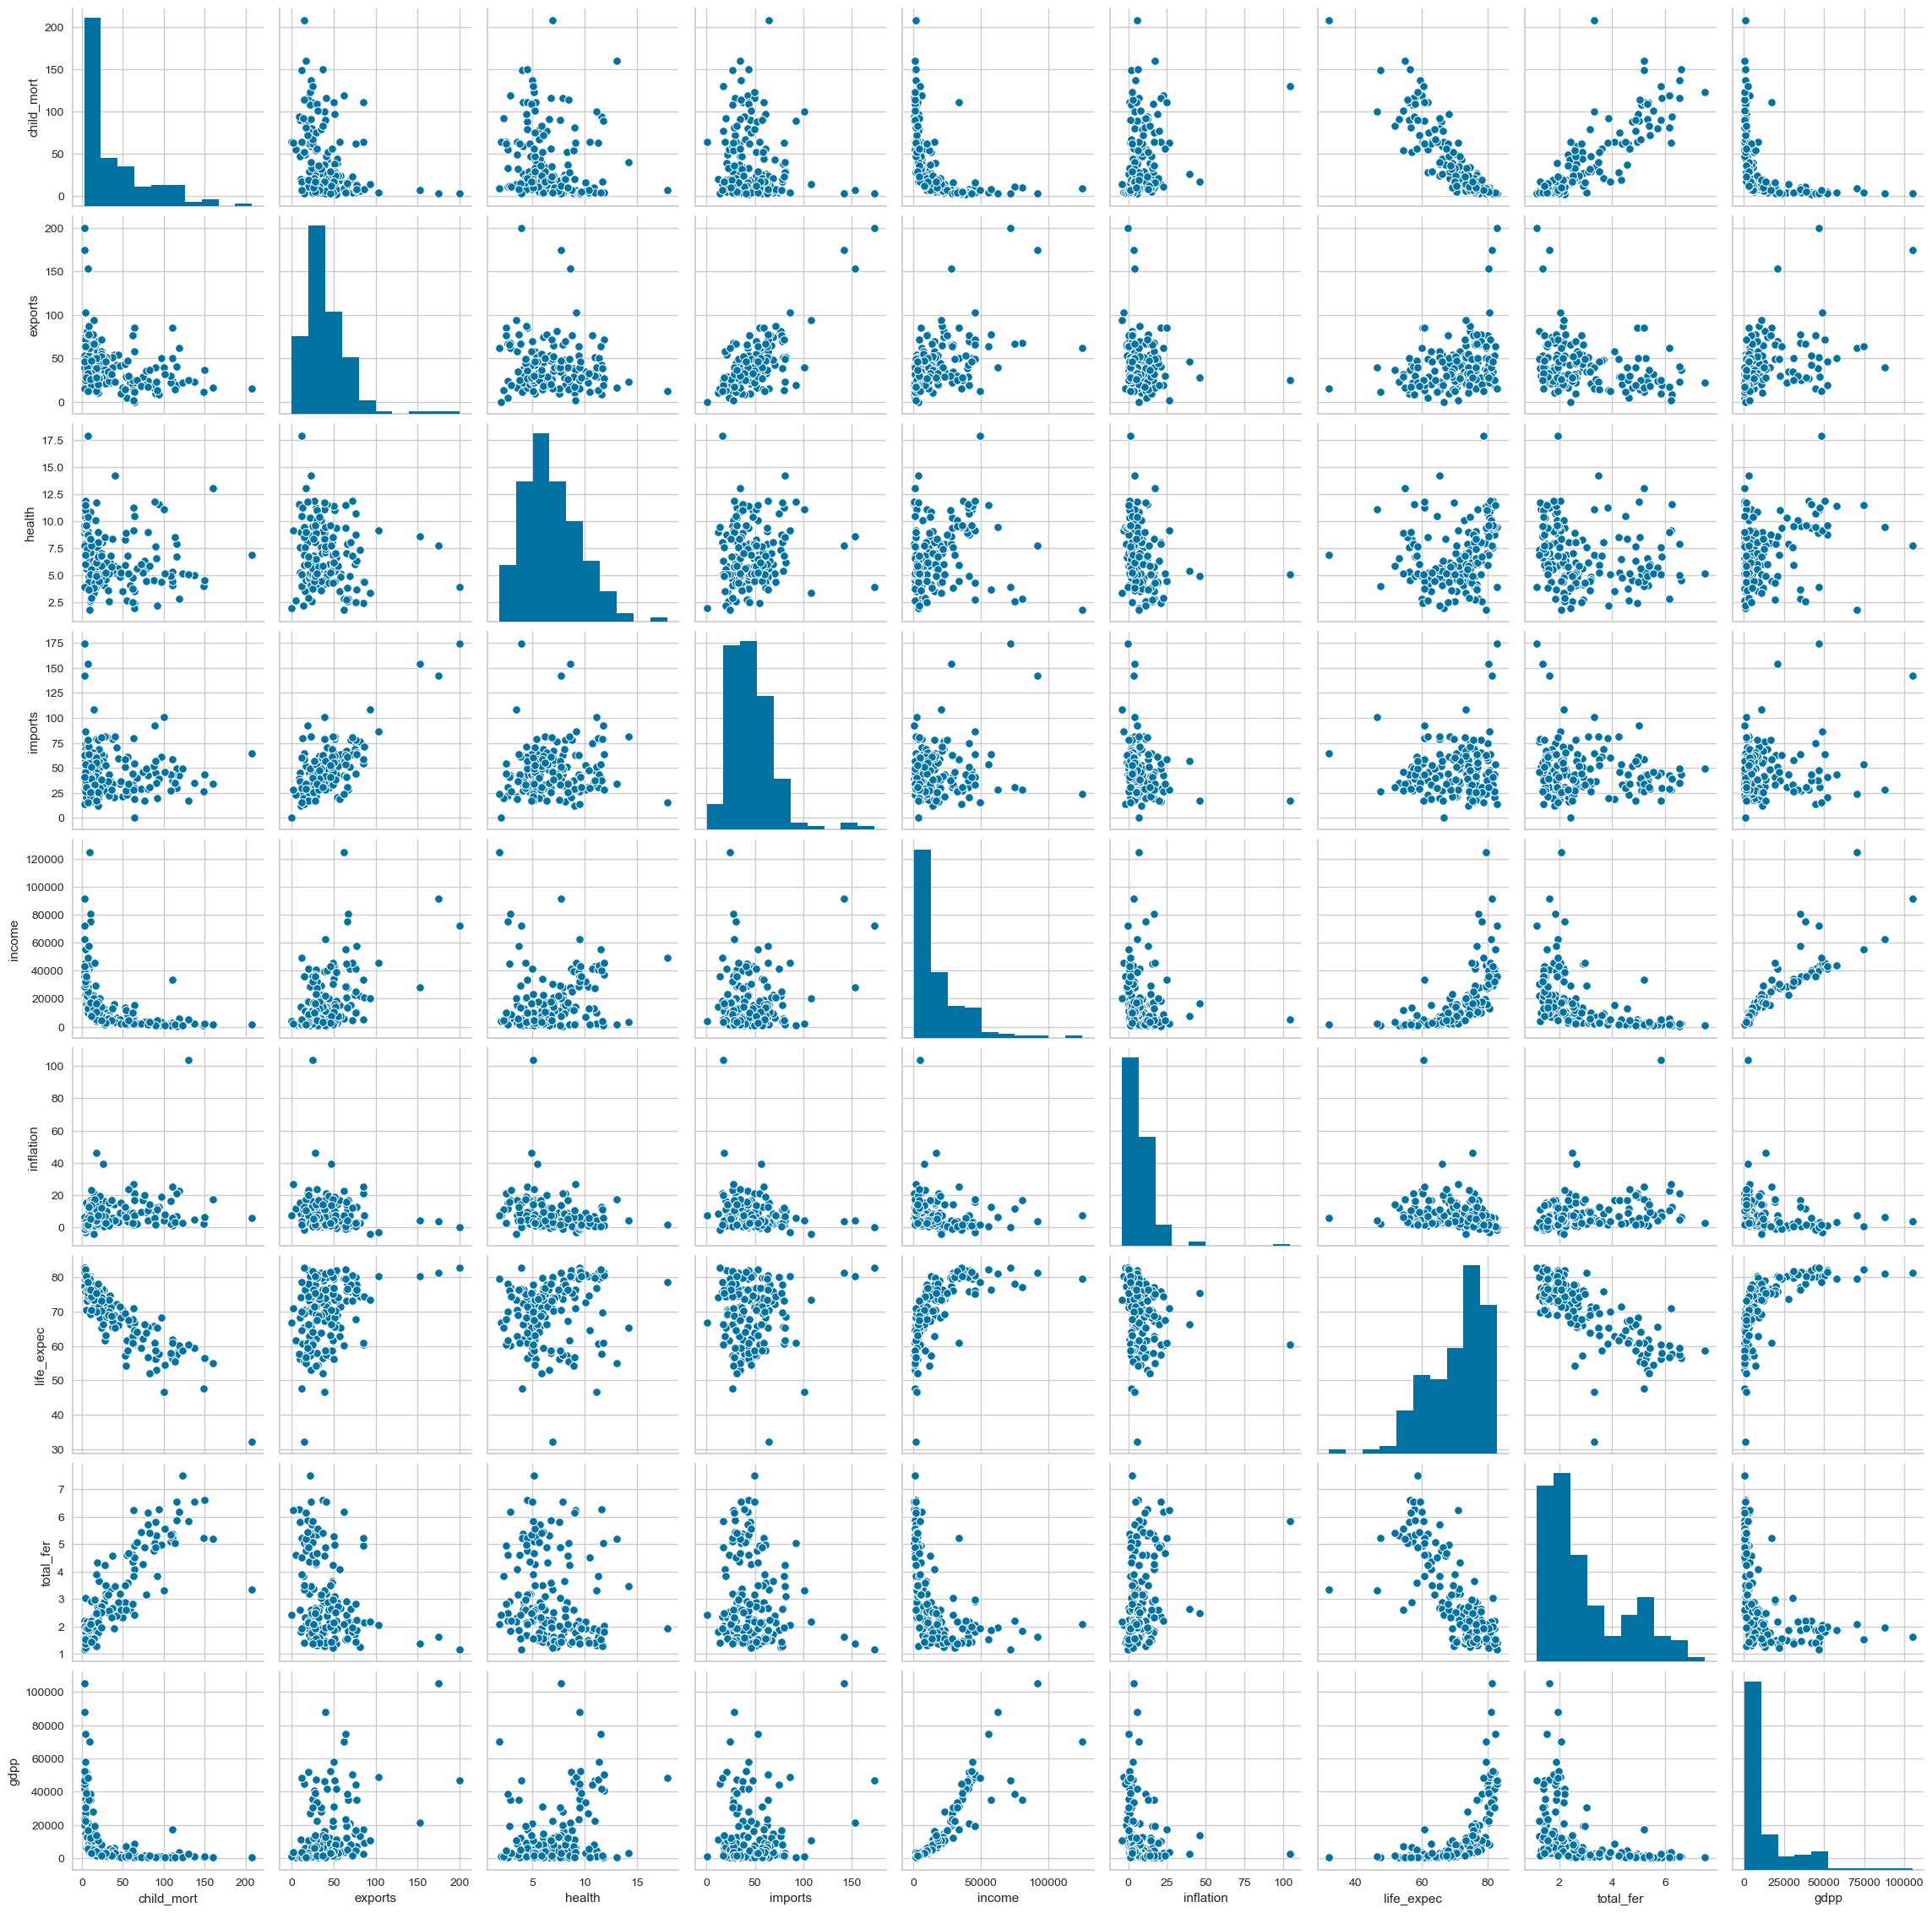

In [10]:
sns.pairplot(data)
plt.show()

### <span style='color:blue'>This pairplot displays how each feature correlates to others, being compared in pairs. So, basically we can observe here how the features pairs that have the highest correlation create a line somehow leaning to the right (increasing), being this pairs:</span>

* <span style='color:blue'>income and gdpp</span>
* <span style='color:blue'>child_mort and total_fer</span>
* <span style='color:blue'>exports and import</span>

### <span style='color:blue'>On the other hand, the pairs with the lowest correlation create a line somehow but leaning to the left (decreasing), being this pairs:</span>

* <span style='color:blue'>child_mort and life_expect</span>
* <span style='color:blue'>life_expect and total_fer</span>

# 2. Modeling Steps

## Scaling the data using sklearn.preprocessing.StandardScaler and printing the header

In [11]:
# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Converting scaled data back to pandas DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data)

# Verifying scaling printing the header of scaled_df
scaled_df.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## Using sklearn.cluster.KMeans to cluster the data. Trying values of n_cluster in the range [2, 10]; calculating and storing the silhouette score for each cluster.

In [12]:
k_means_list = []
k_range = []
silhouette_score_list = []

for k in range(2, 11):
    # Storing n_clusters values in k_range variable
    k_range.append(k)
    print(f'K = {k}\n')
    
    # Clustering the data using values from 2 to 10 as values for n_cluster parameter
    k_means_list.append(KMeans(n_clusters = k, random_state = 0).fit(scaled_data))
    print(k_means_list[k - 2])
    
    # Calculating silhoutte score for each cluster
    silhouette_score_list.append(silhouette_score(scaled_data, k_means_list[k - 2].fit_predict(scaled_data)))
    print(f'\nSilhoutte Score: {silhouette_score_list[k - 2]}\n')

K = 2

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Silhoutte Score: 0.28735668921406704

K = 3

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Silhoutte Score: 0.28329575683463126

K = 4

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Silhoutte Score: 0.30210825058992513

K = 5

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Silhoutte Score: 0.21958577766737195

K = 6

KMeans(algorithm='auto', copy_x=True, init='k-mea

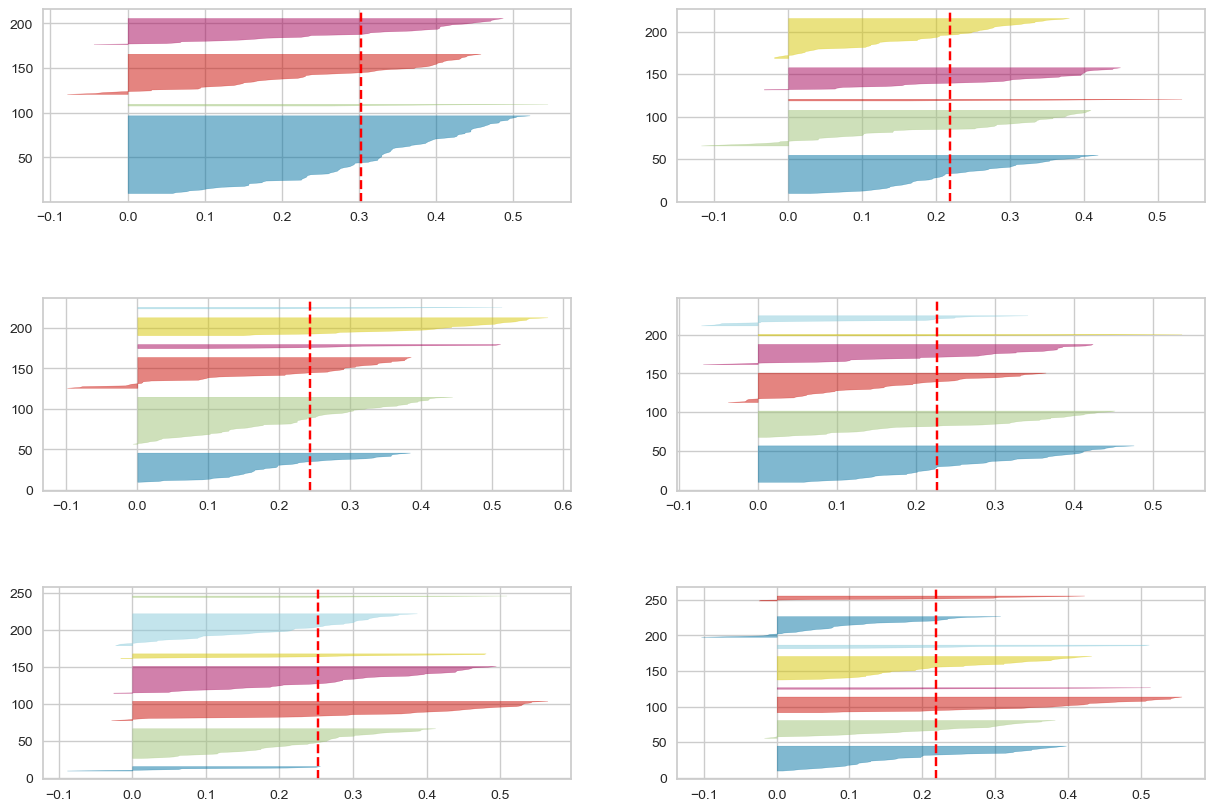

In [13]:
# Silhouette visualization for different values of n_clusters
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

for i in [2, 3, 4, 5, 6, 7]:
    
    # Determining position in subplot grid
    q, mod = divmod(i, 2)
    
    # Creating SilhouetteVisualizer instance with KMeans
    visualizer = SilhouetteVisualizer(k_means_list[i], colors='yellowbrick', ax=ax[q-1][mod])
    
    # Fitting the visualizer to the scaled data
    visualizer.fit(scaled_data)
    
# Displaying the silhouette visualizations
plt.show()

## Plotting Silhouette Score vs. n_clusters

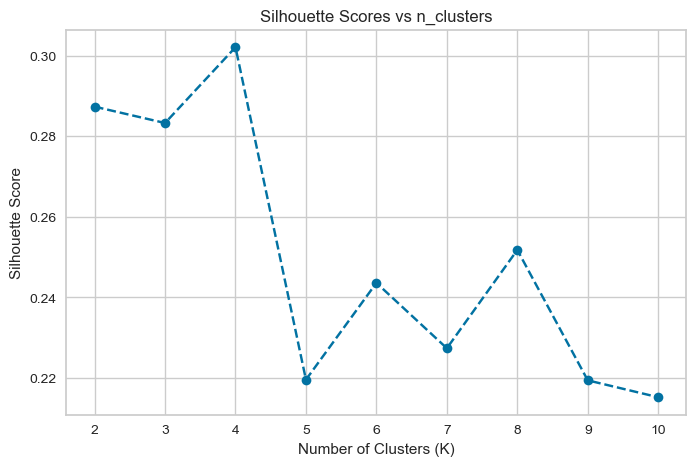

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_score_list, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores vs n_clusters')
plt.xticks(k_range)
plt.show()

### <span style='color:blue'>The higher value for the silhoutte score (being the ideal value equals to 1) is when n_cluster is equal to 4, therefore this corresponds to the best model in this case.</span>

## Saving the corresponding model as the best model along with its silhoutte score

In [15]:
# Using numpy.argmax obtaing based on silhoutte score list the best model (the n_clusters value that produces 
# the highest silhoutte score value)
best_model = k_means_list[np.argmax(silhouette_score_list)]
silhouette_score_index = np.argmax(silhouette_score_list)

print(f'K = {best_model.n_clusters}\n')
print(best_model)
print(f'\nSilhoutte Score: {silhouette_score_list[silhouette_score_index]}')

K = 4

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Silhoutte Score: 0.30210825058992513


# 3. Conclusions

##  Based on our analysis in step 1, choosing a pair of columns and generating a scatter plot of the data. Using the model predictions to colour the points according to the cluster they belong to.

In [16]:
# Predicting the closest cluster each data point in scaled_data belongs to, and storing it as labels (for best_model)
labels = best_model.predict(scaled_data)
labels

array([2, 0, 0, 2, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0,
       0, 3, 0, 2, 2, 0, 2, 3, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 3, 0,
       3, 0, 0, 0, 0, 2, 2, 0, 0, 3, 3, 2, 2, 0, 3, 2, 3, 0, 0, 2, 2, 0,
       2, 0, 3, 0, 0, 0, 2, 3, 3, 3, 0, 3, 0, 0, 2, 2, 3, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       3, 3, 2, 2, 3, 0, 2, 0, 0, 0, 0, 0, 3, 3, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 3, 0, 2, 3, 3, 0, 0, 2, 0, 3, 3, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

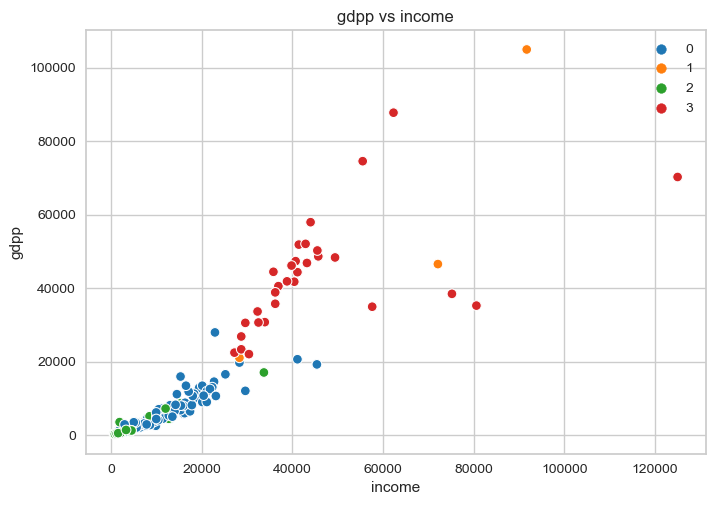

In [17]:
# Using predictions stored in labels to color each cluster data point and plotting the scatter plot
sns.scatterplot(data['income'], data['gdpp'], hue = labels, palette = 'tab10')
plt.title('gdpp vs income')
plt.xlabel('income')
plt.ylabel('gdpp')
plt.show()

### <span style='color:blue'>The scatter plot before shows the correlation between gdpp vs income, being this pair the one with the highest correlation of this dataset. The predictions stored in labels are used to display the data points distribution among the four clusters based on the best model obtained.</span>

## Generating a histogram that shows the number of countries in each cluster

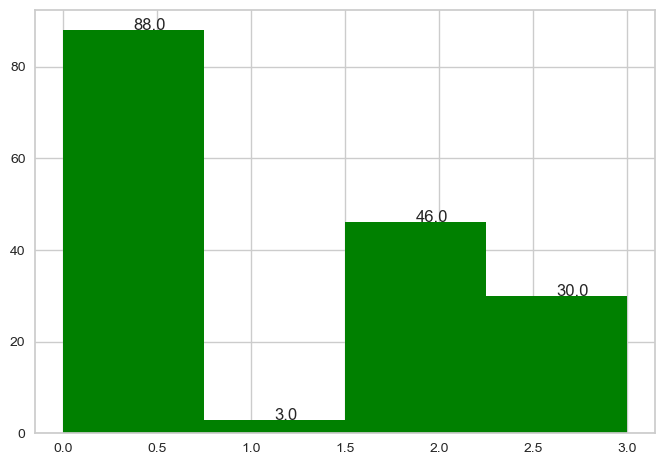

In [18]:
# Using hist() method to make a histogram. To show the count for each bar iterating the patches and calculating
# the mid-values of each patch and height of the patch to place a text.
_, _, patches = plt.hist(labels, bins = 4, align="mid", color = 'green')

for pp in patches:
   x = (pp._x0 + pp._x1)/2
   y = pp._y1 + 0.05
   plt.text(x, y, pp._y1)
plt.show() 

### <span style='color:blue'>As we can see there are 88 countries in the first cluster, 3 countries in the second, 46 countries in the third and 30 countries in the last one. Considering the second cluster ended with just 3 data points, we decided to use k = 3 as the optimal k value, looking forward for a more balanced data points distribution among clusters</span>

In [19]:
final_model = k_means_list[1]
final_silhouette_score = silhouette_score_list[1]

print(f'K = {k_range[1]}\n')
print(final_model)
print(f'\nSilhoutte Score: {final_silhouette_score}')

K = 3

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Silhoutte Score: 0.28329575683463126


In [20]:
# Predicting the closest cluster each data point in scaled_data belongs to, and storing it as labels (for best_model)
final_labels = final_model.predict(scaled_data)
final_labels

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

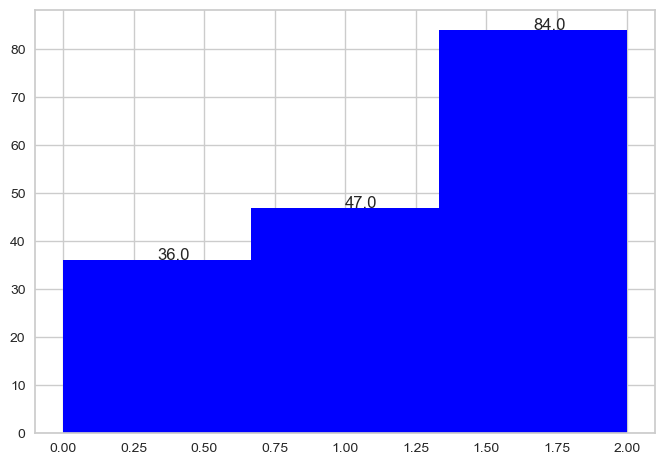

In [21]:
# Using hist() method to make a histogram. To show the count for each bar iterating the patches and calculating
# the mid-values of each patch and height of the patch to place a text.
_, _, patches = plt.hist(final_labels, bins = 3, align="mid", color = 'blue')

for pp in patches:
   x = (pp._x0 + pp._x1)/2
   y = pp._y1 + 0.05
   plt.text(x, y, pp._y1)
plt.show() 

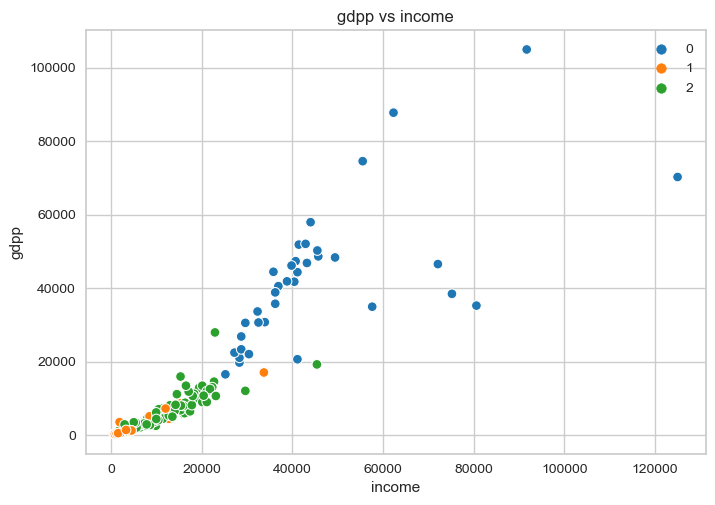

In [22]:
# Using predictions stored in fina_labels to color each cluster data point and plotting the scatter plot
sns.scatterplot(data['income'], data['gdpp'], hue = final_labels, palette = 'tab10')
plt.title('gdpp vs income')
plt.xlabel('income')
plt.ylabel('gdpp')
plt.show()

## Printing the names of the countries within each cluster

In [23]:
# Adding the cluster identifier as a feature to the DataFrame named countries
countries['Cluster'] = pd.DataFrame(final_labels, columns = ['Cluster'])
countries.head()

,country,Cluster
0,Afghanistan,1
1,Albania,2
2,Algeria,2
3,Angola,1
4,Antigua and Barbuda,2


In [24]:
# Printing out the names of the countries within each cluster
for cluster in range(final_model.n_clusters):
    print(f"Cluster {cluster}:\n {countries[countries['Cluster'] == cluster]}\n")

Cluster 0:
                   country  Cluster
7               Australia        0
8                 Austria        0
11                Bahrain        0
15                Belgium        0
23                 Brunei        0
29                 Canada        0
42                 Cyprus        0
43         Czech Republic        0
44                Denmark        0
53                Finland        0
54                 France        0
58                Germany        0
60                 Greece        0
68                Iceland        0
73                Ireland        0
74                 Israel        0
75                  Italy        0
77                  Japan        0
82                 Kuwait        0
91             Luxembourg        0
98                  Malta        0
110           Netherlands        0
111           New Zealand        0
114                Norway        0
122              Portugal        0
123                 Qatar        0
133             Singapore        0
134     

In [25]:
# Adding to data, columns / features in DataFrame countries (pandas.append is not working for the version used)
data['country'] = countries['country']
data['Cluster'] = countries['Cluster']
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,Cluster
0,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,Afghanistan,1
1,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,Albania,2
2,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,Algeria,2
3,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,Angola,1
4,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,Antigua and Barbuda,2
5,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,Argentina,2
6,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,Armenia,2
7,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900,Australia,0
8,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900,Austria,0
9,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,Azerbaijan,2


In [26]:
# Grouping by cluster, the sorted values in ascending order considered the gdpp (listing the top 5)
# gdpp was used based on that the GPD provides information about the size of the economy and how an economy
# is performing in each country, being worlwide rankings available.
data.sort_values(by = 'gdpp', ascending = 'True').groupby('Cluster').head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,Cluster
26,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,Burundi,1
88,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327,Liberia,1
37,116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,"Congo, Dem. Rep.",1
112,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348,Niger,1
132,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,Sierra Leone,1
109,47.0,9.58,5.25,36.4,1990,15.100,68.3,2.61,592,Nepal,2
146,52.4,14.90,5.98,58.6,2110,12.500,69.6,3.51,738,Tajikistan,2
12,49.4,16.00,3.52,21.8,2440,7.140,70.4,2.33,758,Bangladesh,2
27,44.4,54.10,5.68,59.5,2520,3.120,66.1,2.88,786,Cambodia,2
83,29.6,51.60,6.18,81.7,2790,10.000,68.5,3.10,880,Kyrgyz Republic,2


### <span style='color:blue'>Based on information above, we considered that the order of the clusters from those that need aid the most, to those that need aid the least:
    
* Second cluster 
* Third cluster 
* First cluster

## Describing the distribution of funds among countries, based on previous values distributing the funds available (US$100M) accordingly, considering aid need as well as countries amount per cluster.

<div style="display: inline-block">
<table> 
<tr><tr><th><th style="text-align:center">Cluster Identifier<th style="text-align:center">Country Amount per Cluster<th><th style="text-align:center">Funds per Cluster<th><th style="text-align:center">Funds per Country<tr><tr>
<tr><td><td style="text-align:center">Second (index 1)<td style="text-align:center">47<td><td style="text-align:center">US60M<td><td style="text-align:center">US1.283M<td>
<tr><td><td style="text-align:center">Third (index 2)<td style="text-align:center">84<td><td style="text-align:center">US35M<td><td style="text-align:center">US416.67K<td>
<tr><td><td style="text-align:center">First (index 0)<td style="text-align:center">36<td><td style="text-align:center">US5M<td><td style="text-align:center">US138.89K<td>
</table>
</div>